In [158]:
# Imports
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import genfromtxt



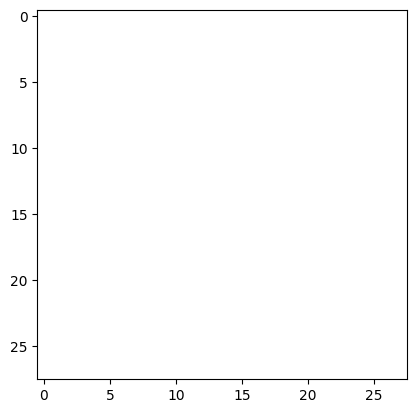

In [160]:
image1 = [[0] * 28 for _ in range(28)]
for i in range(5, 23):
    image1[i][14] = 1



my_data = genfromtxt('Assets/twoPixelWide.csv', delimiter=',')
plt.imsave('nandini.png', my_data, cmap='gray')
image_1 = plt.imread('nandini.png')
# plot raw pixel data
plt.imshow(image_1)
# show the figure
plt.show()


kernel = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]



In [153]:
def convolve(image, kernel):
    # Get the dimensions of the image and the kernel
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    # print("Image dimensions (height, width) => ", image_height, image_width)
    # print("Kernel dimensions (height, width) => ", kernel_height, kernel_width)
    
    # Calculate the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    print("Output dimensions (height, width) => ", output_height, output_width)
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # plt.figure(1)
    # plt.imshow(output, cmap='gray')
    # plt.title('Initial Output Image')
    # plt.show()
    
    # Perform the convolution
    
    for i in range(output_height):
        #print("Processing row i => ", i)
        for j in range(output_width):
            #print("  Processing column j => ", j)
            sum_value = 0
            for m in range(kernel_height):
                #print("    Kernel row m => ", m)
                for n in range(kernel_width):
                    #print("      Kernel column n => ", n)
                    sum_value += image[i + m][j + n] * kernel[m][n]
                    #print("      Updated sum_value => ", sum_value)
            output[i][j] = sum_value
            #print("  Updated output at position (i, j) => ", output[i][j])
            
            # # Plot the current output after each update
            # plt.figure(fig_num)
            # plt.imshow(output, cmap='gray')
            # plt.title(f'Convolution Step: i={i}, j={j}')
            # plt.show()
            # fig_num += 1
            
    # print("Final output image after convolution:")
    # for row in output:
    #     print(row)
    
    return output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output dimensions (height, width) =>  26 26
[array([-0.00392157,  0.00784308,  0.        ,  0.        ], dtype=float32), array([ 0.        , -0.00392157, -0.00392157,  0.        ], dtype=float32), array([ 0.        , -0.00784314, -0.00392157,  0.        ], dtype=float32), array([0.00392151, 0.        , 0.00392151, 0.        ], dtype=float32), array([0.        , 0.00392151, 0.00392151, 0.        ], dtype=float32), array([-0.00392157,  0.        , -0.00392157,  0.        ], dtype=float32), array([ 0.        , -0.00392157,  0.        ,  0.        ], dtype=float32), array([0.00392151, 0.00392151, 0.00392151, 0.        ], dtype=float32), array([0.        , 0.00784308, 0.00392151, 0.        ], dtype=float32), array([ 0.        , -0.00392157, -0.00392157,  0.        ], dtype=float32), array([ 0.00392151, -0.00784314, -0.00784314,  0.        ], dtype=float32), array([-5.9604645e-08,  3.9215088e-03,  3.9215088e-03,  0.0000000e+00],
      dtype=float32), array([0.        , 0.00392151, 0.00392151

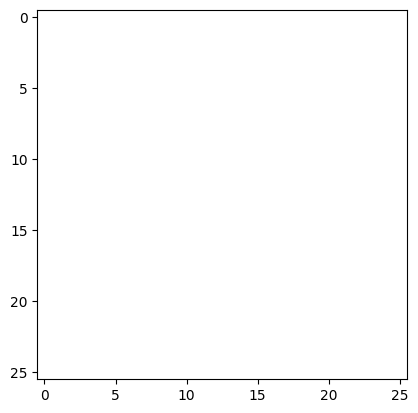

In [154]:
# Convolve the image with the kernel
output_image1 = convolve(image1, kernel)
plt.imshow(output_image1, cmap="gray")

# Print the convolved image (output)
for row in output_image1:
    print(row)


In [155]:
def max_pooling(image, pool_size=2):
    image_height, image_width = len(image), len(image[0])
    pool_height, pool_width = pool_size, pool_size
    
    # Calculate output dimensions
    output_height = image_height // pool_height
    output_width = image_width // pool_width
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # Perform max pooling
    for i in range(output_height):
        for j in range(output_width):
            # Define the window
            window = [image[i * pool_height + m][j * pool_width + n] 
                      for m in range(pool_height) for n in range(pool_width)]
            # Find the maximum value in the window
            output[i][j] = max(window)
            
    return output


In [156]:
# Convolve the image with the kernel
pool_image1 = max_pooling(output_image1)
plt.imshow(pool_image1, cmap="gray")

# Print the convolved image (output)
for row in pool_image1:
    print(row)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()